Data Understanding

In [2]:
import pandas as pd
df=pd.read_csv("bi.csv",encoding='ISO-8859-1')
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [3]:
df.shape

(77, 11)

In [4]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

In [5]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


Data Cleaning & missing values  

In [6]:
df[df.duplicated()]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [10]:
df['Python'].fillna(df['Python'].mean(),inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [12]:
df.nunique()

fNAME            71
lNAME            66
Age              32
gender            6
country          16
residence         6
entryEXAM        36
prevEducation    10
studyHOURS       18
Python           32
DB               40
dtype: int64

In [13]:
for col in df.columns:
    print(f"\nستون {col}:{df[col].unique()}\n")


ستون fNAME:['Christina' 'Alex' 'Philip' 'Shoni' 'Maria' 'Hannah' 'Ole' 'Lars' 'Bjørn'
 'Sofie' 'Emma' 'Solveig' 'Odd' 'Grethe' 'Marco' 'Ingrid' 'Hanna' 'Jorunn'
 'Sebastian' 'Camilla' 'Prof' 'Kristine' 'Carmen' 'Gunnar' 'Gerd' 'Aisha'
 'Kato' 'Nansubuga' 'Joakim' 'Don' 'Perry' 'Frank' 'Line' 'Thor' 'Petter'
 'Sindre' 'Simen' 'Bjørg' 'Trond' 'Emily' 'Unni' 'Ruth' 'Inger' 'Peninah'
 'Berit' 'Jenny' 'Thea' 'Dag' 'Mwanaidi' 'Chinedu' 'Irene' 'Marianne'
 'Jens' 'Morten' 'Karoline' 'Ola' 'Tore' 'Caroline' 'Silvia' 'Valentino'
 'Peter' 'Anna' 'Lucas' 'Marie' 'Thomas' 'Maximilan' 'Clara' 'Julian'
 'Sophie' 'Leon' 'Mohammed']


ستون lNAME:['Binger' 'Walekhwa' 'Leo' 'Hlongwane' 'Kedibone' 'Hansen' 'Johansen'
 'Olsen' 'Larsen' 'Jensen' 'de Vries' 'Eliassen' 'Knudsen' 'Myklebust'
 'Rossi' 'Eide' 'Andresen' 'Kristiansen' 'Mikkelsen' 'Birkeland' 'Isaksen'
 'Berg' 'Rodríguez' 'Ahmed' 'Brekke' 'Bakken' 'Nakaweesi' 'Muwanguzi'
 'Nakalema' 'Edvardsen' 'Pettersen' 'Rønning' 'Abrahamsen' 'Næss'
 'Sandvik

In [14]:
df['gender'] = df['gender'].replace({'M': 'Male','F': 'Female','male':'Male','female':'Female'})
df['country']=df['country'].replace({'norway':'Norway'})
df['residence']=df['residence'].replace({'BI Residence':'BI_Residence','BIResidence':'BI_Residence','BI-Residence':'BI_Residence'})
df['prevEducation']=df['prevEducation'].replace({'Barrrchelors':'Bachelors','HighSchool':'High School','Diplomaaa':'Diploma','DIPLOMA':'Diploma','diploma':'Diploma'})

In [15]:
df['prevEducation'].value_counts()

prevEducation
Bachelors      25
High School    19
Masters        16
Diploma        12
Doctorate       5
Name: count, dtype: int64

In [16]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [17]:
df_no_outliers = df.copy()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for coll in numerical_cols:
    Q1=df[coll].quantile(0.25)
    Q3=df[coll].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=(df[coll] < lower_bound) | (df[coll] > upper_bound)
    print(f'columns:{coll}\noutlier is :\n{df[outliers][coll]}')
    print('\n')
    df_no_outliers = df_no_outliers[(df_no_outliers[coll] >= lower_bound) & (df_no_outliers[coll] <= upper_bound)]
    print(f'columns:{coll}\ndata wihout any outlier \n {df_no_outliers[coll]}\n\n')

columns:Age
outlier is :
32    71
55    69
Name: Age, dtype: int64


columns:Age
data wihout any outlier 
 0     44
1     60
2     25
3     22
4     23
      ..
72    43
73    31
74    33
75    35
76    31
Name: Age, Length: 75, dtype: int64


columns:entryEXAM
outlier is :
32    30
53    28
76    35
Name: entryEXAM, dtype: int64


columns:entryEXAM
data wihout any outlier 
 0     72
1     79
2     55
3     40
4     65
      ..
71    74
72    80
73    90
74    96
75    90
Name: entryEXAM, Length: 73, dtype: int64


columns:studyHOURS
outlier is :
3     120
4     122
20    116
21    114
32    120
49    120
53    120
Name: studyHOURS, dtype: int64


columns:studyHOURS
data wihout any outlier 
 0     158
1     150
2     130
5     130
6     156
     ... 
71    140
72    150
73    158
74    158
75    160
Name: studyHOURS, Length: 68, dtype: int64


columns:Python
outlier is :
20    33.0
21    30.0
32    31.0
48    48.0
49    45.0
53    15.0
Name: Python, dtype: float64


columns:Python
data

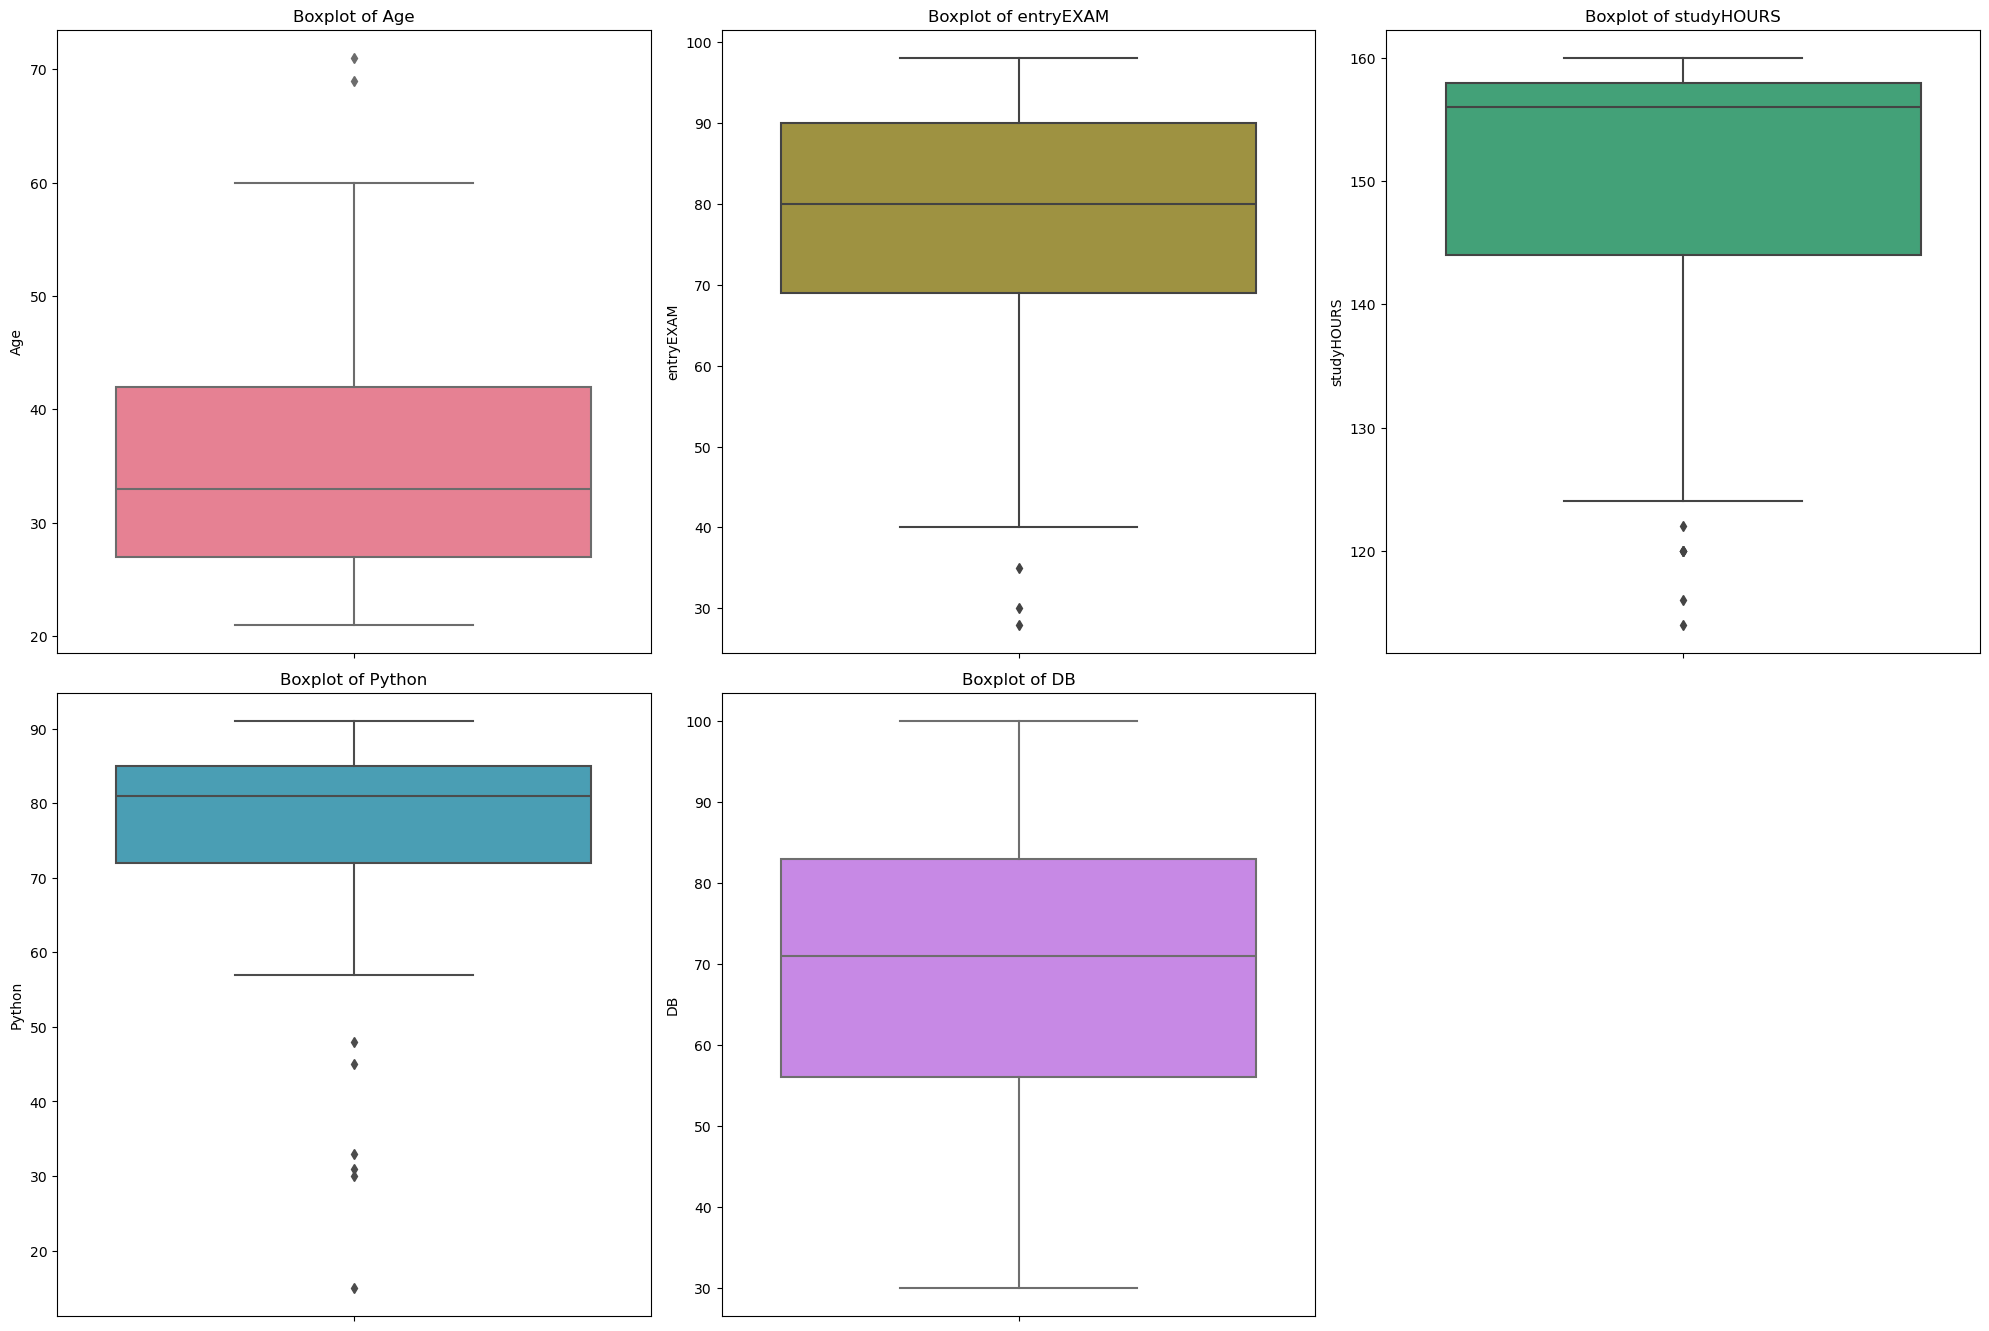

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Define color palette
palette = sns.color_palette("husl",len(numerical_cols))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



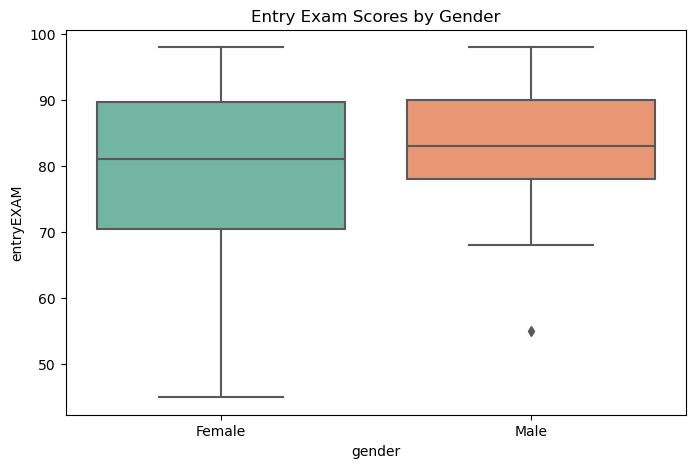

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="entryEXAM", data=df_no_outliers, palette="Set2")
plt.title("Entry Exam Scores by Gender")
plt.show()

In [20]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [21]:
df['country'].value_counts().sort_values(ascending=False)

country
Norway          48
Uganda           4
Kenya            3
Germany          3
Denmark          2
Netherlands      2
Italy            2
Spain            2
UK               2
Somali           2
Nigeria          2
France           2
Rsa              1
South Africa     1
Norge            1
Name: count, dtype: int64